# Project 2 
# GENERAL INSTRUCTIONS: 
## this is NOT a group project 
- CLEARLY mark where you are answering each question (all written questions must be answered in Markdown cells, NOT as comments in code cells) 
- Show all code necessary for the analysis, but remove superfluous code 

-------------------------------------------------------------------------------------------------------

# DONUTS 
### Using the dataset krispykreme.csv, 
- a) make 3 scatterplots using ggplot to show: 
  - Sodium_100g vs Total_Fat_100g 
  - Sodium_100g vs. Sugar_100g 
  - Sugar_100g vs Total_Fat_100g 
    You will be graded on the effectiveness of the graphs as well as their content. 
- b) Using the scatterplots from part a as well as the donuts dataset, thouroughly discuss which clustering method (KMeans, Gaussian Mixture Models (EM), Hierarchical Clustering, or DBSCAN) you think would be best for this data and WHY. Be sure to include discussions of assumptions each algorithm does/does not make, and what types of data they are good/bad for (mention each of the 4 algorithms at least once) and how they apply to this specific dataset. (IN A MARKDOWN CELL) 
    - you should be making statements that both 1) discuss characteristics of the algorithm and 2) specifically discuss how that characteristic applies (or doesn't) to this dataset.
    
Please note that for this assignment, "It's easier to code" does not count as a valid reason. The reasons should be based on the algorithms/data. 
(You must use "'"*" to make any mention of one of the algorithms bold in your discussion. For example "I think **DBSCAN** is the best algorithm ever!" will make the word "DBSCAN" bold in a Markdown cell). 
- c) Implement the TWO algorithms you think will work BEST (1 algo) and WORST (1 algo) here using all 3 variables Sodium_100g , Total_Fat_100g and Sugar_100g , and describe how you chose any hyperparameters (such as distance, # of clusters, min_samples, eps, linkage...etc). Make sure to z-score your variables. (IN A MARKDOWN CELL) 
- d) Thouroughly discuss the performance of your clustering models. For each algorithm (best and worst): 
     - which metric did you use to asses your model? (IN A MARKDOWN CELL) 
     - how did your model perform? (IN A MARKDOWN CELL) 
     - remake the 3 graphs from part a, but color by cluster assignment. Describe what characterizes each cluster, and give an example of a label for that cluster (e.g. "these donuts are low fat, and low sugar so I would call these healthy donuts") (IN A MARKDOWN CELL) 
- e) Choose ONE other of the _100g variables from the data set to add to your clustering model to improve it. 
    - explain why you chose this variable. Either based on improvement in metrics, or outside knowledge you have about food/donuts (IN A MARKDOWN CELL) 
    - make a new model, identical to the model in part c, but also including your new variable. 
    - did this variable improve the fit of your clustering model? How can you tell? (IN A MARKDOWN CELL) 
    
Note: The columns with _100g at the end represent the amount of that nutrient per 100 grams of the food. For example, Total_Fat tells you the total amount of fat in that food, whereas Total_Fat_100g tells you how much fat there is per 100 grams of that food. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as p9
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler
from plotnine import *
from kneed import KneeLocator

In [2]:
df=pd.read_csv('KrispyKreme.csv')
df.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


## Question A) 

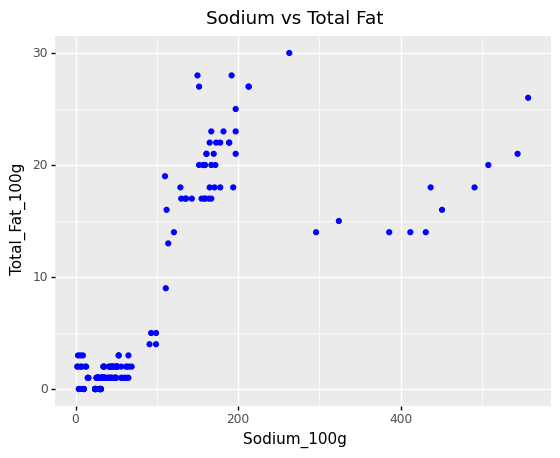

<ggplot: (124682149846)>

In [3]:
p = ggplot(aes(x='Sodium_100g', y='Total_Fat_100g'), df)
p + geom_point(color='blue')+ggtitle('Sodium vs Total Fat')

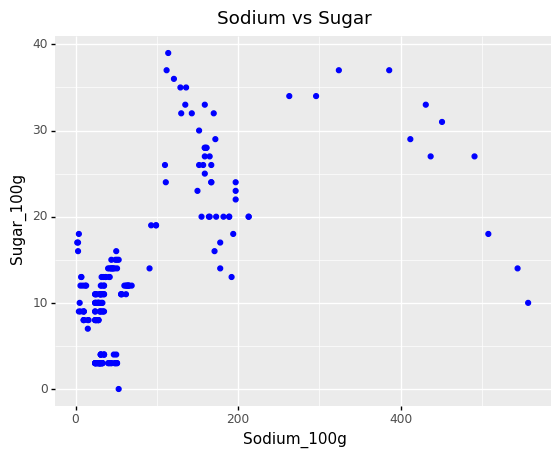

<ggplot: (124682773887)>

In [4]:
p = ggplot(aes(x='Sodium_100g', y='Sugar_100g'), df)
p + geom_point(color='blue')+ggtitle('Sodium vs Sugar')

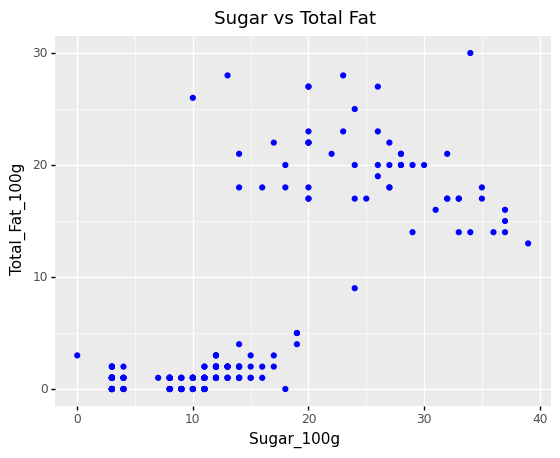

<ggplot: (124682696590)>

In [5]:
p = ggplot(aes(x='Sugar_100g', y='Total_Fat_100g'), df)
p + geom_point(color='blue')+ggtitle('Sugar vs Total Fat')

## Question B)

Okay first lets discuss the pros and cons for each of these algorithms

<b>Kmeans</b> is a simple , efficient and fast algorithm and can be scaled with problems of massive data. while it disadvantages that it is senstive to noise and initializations and Kmeans also assumes spherical shapes of clusters so it doesn't works well with clusters of different sizes and different shapes such as elliptical clusters.

<b>Hierarchial Clustering</b> is easier to pick the number of clusters (K) compared to Kmeans as it can be chosen by looking at the dendogram  , The visualization of dendrogram is very useful in understanding the data , It can be also used with categorical data. while it disadvantages is that it has a high time complexity therefore it is not suitable for large datasets , it is also sensitive to noise and outliers.

<b>GMM</b> is flexible and works well with overlapped clusters and it considers both mean and variance of the data. it also works well with elliptical data while it disadvantages that it requires somehow alot of data and iterations to get good results.

<b>DBSCAN</b> is robust to noise and outliers , and it works well with arbitary shapes cluster and also it doesn't require one to specify the number of clusters k as a hyperparameter while it disadvantages that it doesn't work with clusters of varying densties or far data points and is not effiecient for high dimension datasets



From the 3 scatter plots above . I think that the best models that can work with this data is <b>kmeans</b> algorithm and <b>GMM</b> algorithm as we can see from the scatter plots that there is no noise and the clusters are well seperated and also the clusters data points seems to be equal in size.<b>Kmeans</b> is a good choice as it is simple and there is no noise nor outliers that can affect it and also the datapoints in clusters are well seperated and <b>GMM</b> is also a good choice as it consider the mean and variance of the datapoints in the clusters and we can see that the variance somehow differs from one cluster to another. while I think the worst model is <b>DBSCAN</b> as the datapoints in some of the clusters are far from each other so it is difficlut to choose min_samples and epsilon that can work well for all clusters.

## Question C)

In [6]:
#extracting the three features from the datafrme and applying Z_score for these variables
X=df[['Sodium_100g','Total_Fat_100g','Sugar_100g']]
scaler = StandardScaler()
X=scaler.fit_transform(X)

Here we extracted our columns of intersets which are Sodium_100g, Total_Fat_100g and Sugar_100g and then we applied standraization on these columns . The standraization is important to be done before applying clustering algorithms in order to make all the features values within the same range so the clustering algorithm is not baised towards a feature than another

C:\Users\vertex\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


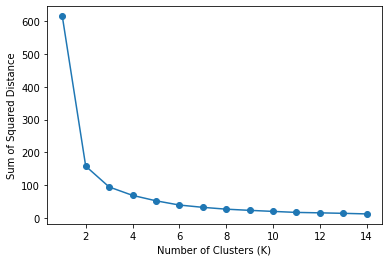

In [7]:
#kmeans how to choose hyperparameter K.
#X=df[['Sodium_100g','Total_Fat_100g','Sugar_100g']]
SSD=[]
for k in range(1,15):
    kmeans=KMeans(k)
    kmeans.fit(X)
    SSD.append(kmeans.inertia_)
plt.plot(range(1,15),SSD,'-o');
plt.xlabel('Number of Clusters (K)');
plt.ylabel('Sum of Squared Distance');

First we implemented the kmeans model. The optimal k was chosen by the <b>Elbow Method</b> we can see from the plot above that it looks like an arm , then the elbow on the arm is the optimal k which is 3 clusters in our example. after that when the K increases the SSD begins to decrease very slow but when the number of K is maximum this mean that each cluster has only one point and the SSD is equal to 0 but in this case the model totally overfits and will not generalize any thing on the test set, so the Elbow Method is helpful to know which is the optimum K where the SSD is low but the K is not very high at the same time so the model can generalize well

In [8]:
kmeans=KMeans(3)
kmeans.fit(X)

KMeans(n_clusters=3)

After choosing the optimum hyperparameter K value through the Elbow Method which is 3 in our case . The model is fit with 3 clusters.

Chosen epsilon is: 0.6694160944429526


<Figure size 360x360 with 0 Axes>

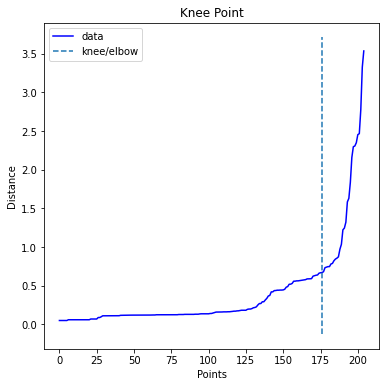

In [11]:
#DBSCAN how to choose hyperparameter epsilon.
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
#print(np.sort(distances))
distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print("Chosen epsilon is: "+str(distances[knee.knee]))
best_eps=distances[knee.knee]

The epsilon value in dbscan is chosen through Knee plot where for every point we calculate the distance of it's neighbors where the distance is calculated through euclidian distance and then those obtained distances are sorted in an increasing order and the distance value on the y-axis that shows a sudden increase is chosen as the opitmal epsilon value. 

In [12]:
scores=[]
def grid_search_dbscan(eps=best_eps):
    for num_pts in range(2,20):
        dbscan=DBSCAN(eps=eps,min_samples=num_pts)
        model=dbscan.fit(X)
        score=silhouette_score(X, model.labels_, metric='euclidean')
        print(score)
        scores.append(score)
    return scores
scores=grid_search_dbscan(best_eps)
scores.reverse()
best_min_pts=len(scores)-scores.index(max(scores))-1
print("optimal number of min_samples to take is "+str(best_min_pts))

0.7120893629981825
0.720546548000319
0.712975547309225
0.7082307909994777
0.7207557560965994
0.7207557560965994
0.7207557560965994
0.7207557560965994
0.7140630919627311
0.7140630919627311
0.7140630919627311
0.7140630919627311
0.7140630919627311
0.7044273065174987
0.6986745604137423
0.6687511908296756
0.6687511908296756
0.6590277557438864
optimal number of min_samples to take is 7


The optimal number of min_samples is chosen through making something like gridsearch where we tried different num_samples from 2 to 20 and saved the one which has the maximum silhouette_score where in our case it is 4 or 5 or 6 or 7.

In [15]:
dbscan=DBSCAN(eps=best_eps,min_samples=best_min_pts)
#dbscan=DBSCAN()
model=dbscan.fit(X)

DBSCAN model is fit after choosing our hyperparameters which are (epsilon and min_samples)

## Question D)

#### - which metric did you use to asses your model?

<b>silhouette_score</b> metric is used to assess the two models (Kmeans and DBSCAN) this metric shows the separation distance between the clusters where the value of this metric lies between -1 and 1 , where value of 1 indicates that the sample is far away from the neighboring clusters while a value close to 0 indicates that the sample is very close to two clusters and negative values indicates that the samples might have been assigned to wrong clusters 

#### - how did your model perform?

In [16]:
kmeans_score=silhouette_score(X, kmeans.labels_, metric='euclidean')
print("silhouette_score for kmeans is: "+str(kmeans_score))

silhouette_score for kmeans is: 0.7422190230687878


In [17]:
print(best_eps)
print(best_min_pts)
DBSAN_score=silhouette_score(X, model.labels_, metric='euclidean')
print("silhouette_score for DBSCAN is: "+str(DBSAN_score))

0.6694160944429526
7
silhouette_score for DBSCAN is: 0.7207557560965994


As mentioned we have used the silhouette_score metric to assess the two models . we can see that both models had got high score close to 1 which indicates that the two models have clustered the data well , Kmeans model has achieved a silhouette_score of about 0.7425 which is slightly higher than DBSAN as DBSCAN has achieved a silhouette_score of about 0.72 .

#### - remake the 3 graphs from part a, but color by cluster assignment

Text(0.5, 1.0, 'Sodium Vs Total Fat with Kmeans')

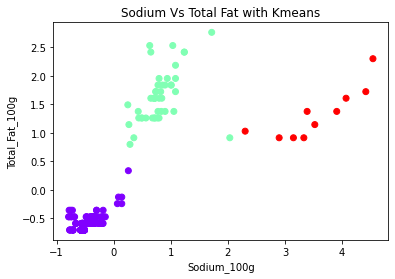

In [142]:
X=df[['Sodium_100g','Total_Fat_100g']]
X=(X-X.mean())/X.std()
kmeans=KMeans(3)
kmeans.fit(X)
data_clusters=kmeans.fit_predict(X)
copy_data=X.copy()
copy_data['Clusters']=data_clusters
plt.scatter(copy_data['Sodium_100g'],copy_data['Total_Fat_100g'],c=copy_data['Clusters'],cmap='rainbow')
plt.xlabel("Sodium_100g")
plt.ylabel("Total_Fat_100g")
plt.title("Sodium Vs Total Fat with Kmeans")

Text(0.5, 1.0, 'Sodium Vs Sugar with Kmeans')

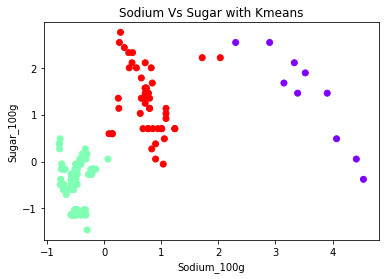

In [143]:
X=df[['Sodium_100g','Sugar_100g']]
X=(X-X.mean())/X.std()
kmeans=KMeans(3)
kmeans.fit(X)
data_clusters=kmeans.fit_predict(X)
copy_data=X.copy()
copy_data['Clusters']=data_clusters
plt.scatter(copy_data['Sodium_100g'],copy_data['Sugar_100g'],c=copy_data['Clusters'],cmap='rainbow')
plt.xlabel("Sodium_100g")
plt.ylabel("Sugar_100g")
plt.title("Sodium Vs Sugar with Kmeans")

Text(0.5, 1.0, 'Sugar Vs Total Fat with Kmeans')

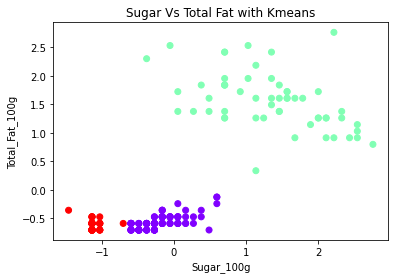

In [144]:
X=df[['Sugar_100g','Total_Fat_100g']]
X=(X-X.mean())/X.std()
kmeans=KMeans(3)
kmeans.fit(X)
data_clusters=kmeans.fit_predict(X)
copy_data=X.copy()
copy_data['Clusters']=data_clusters
plt.scatter(copy_data['Sugar_100g'],copy_data['Total_Fat_100g'],c=copy_data['Clusters'],cmap='rainbow')
plt.xlabel("Sugar_100g")
plt.ylabel("Total_Fat_100g")
plt.title("Sugar Vs Total Fat with Kmeans")

Text(0.5, 1.0, 'Sodium Vs Total Fat with DBSCAN')

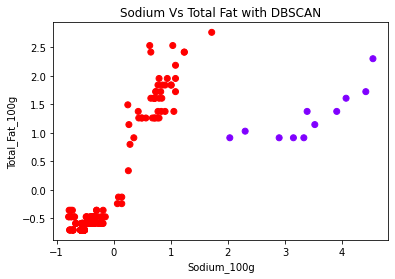

In [145]:
X=df[['Sodium_100g','Total_Fat_100g']]
X=(X-X.mean())/X.std()
dbscan=DBSCAN(eps=best_eps,min_samples=best_min_pts)
dbscan.fit(X)
data_clusters=dbscan.fit_predict(X)
copy_data=X.copy()
copy_data['Clusters']=data_clusters
plt.scatter(copy_data['Sodium_100g'],copy_data['Total_Fat_100g'],c=copy_data['Clusters'],cmap='rainbow')
plt.xlabel("Sodium_100g")
plt.ylabel("Total_Fat_100g")
plt.title("Sodium Vs Total Fat with DBSCAN")

Text(0.5, 1.0, 'Sodium Vs Sugar with DBSCAN')

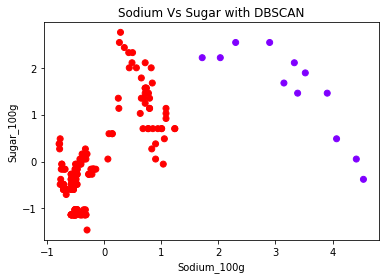

In [146]:
X=df[['Sodium_100g','Sugar_100g']]
X=(X-X.mean())/X.std()
dbscan=DBSCAN(eps=best_eps,min_samples=best_min_pts)
dbscan.fit(X)
data_clusters=dbscan.fit_predict(X)
copy_data=X.copy()
copy_data['Clusters']=data_clusters
plt.scatter(copy_data['Sodium_100g'],copy_data['Sugar_100g'],c=copy_data['Clusters'],cmap='rainbow')
plt.xlabel("Sodium_100g")
plt.ylabel("Sugar_100g")
plt.title("Sodium Vs Sugar with DBSCAN")

Text(0.5, 1.0, 'Sugar Vs Total Fat with DBSCAN')

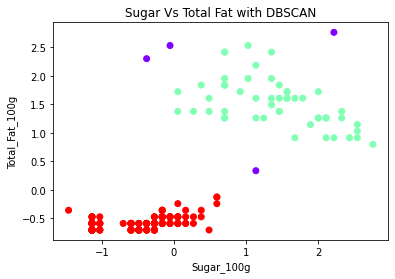

In [147]:
X=df[['Sugar_100g','Total_Fat_100g']]
X=(X-X.mean())/X.std()
dbscan=DBSCAN(eps=best_eps,min_samples=best_min_pts)
dbscan.fit(X)
data_clusters=dbscan.fit_predict(X)
copy_data=X.copy()
copy_data['Clusters']=data_clusters
plt.scatter(copy_data['Sugar_100g'],copy_data['Total_Fat_100g'],c=copy_data['Clusters'],cmap='rainbow')
plt.xlabel("Sugar_100g")
plt.ylabel("Total_Fat_100g")
plt.title("Sugar Vs Total Fat with DBSCAN")

In the above cells, 3 plots are done that shows Sodium vs Total Fat , Sodium vs Sugar and Sugar vs Total Fat. There 3 plots are done for both Kmeans and DBSCAN. it seems that Kmeans perform better on the data as the clusters are more well seperated compared to the DBCAN , We can see from the DBSCAN plots that DBSCAN takes more samples in the same cluster where these samples should belong to a new cluster.

As Kmeans performs better on this dataset lets characterize each cluster on the plots related to Kmeans which are the first three plots in the above cells.

In the Plot Sodium Vs Total Fat with Kmeans . The first purple cluster corresponds to donuts with low sodium and low fat , The second cyan cluster corresponds to donuts with intermediate sodium and high fats , The third red cluster corresponds to donuts with high sodium and intermediate fats.

In the Plot Sodium Vs Sugar with Kmeans. The first cyan cluster corresponds to donuts with low sodium and low sugar , The second red cluster corresponds to donuts with intermediate sodium and high sugar , the third purple cluster corresponds to donuts with high sodium and intermediate sugar.

In the Plot Sugar Vs Total Fat with Kmeans. The first red cluster corresponds to donuts with low sugar and low fat , The second purple cluster corresponds to donuts with intermediate sugar and low fats , The third cyan cluster corresponds to donuts with high suger and high fat.


## Question E)

In [148]:
df.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


I think we can add Carbohydrates_100g to our variables as most of donuts are rich in Carbohydrates so it can help us to distinguish between the clusters

In [256]:
X=df[['Sodium_100g','Total_Fat_100g','Sugar_100g','Carbohydrates_100g']]
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [257]:
kmeans=KMeans(3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [258]:
dbscan=DBSCAN(eps=best_eps,min_samples=best_min_pts)
model=dbscan.fit(X)

In [266]:
kmeans_score=silhouette_score(X, kmeans.labels_, metric='euclidean')
print("Kmeans score after adding the new variable is: "+str(kmeans_score))

Kmeans score after adding the new variable is: 0.7489100196821574


In [267]:
DBSCAN_score=silhouette_score(X, model.labels_, metric='euclidean')
print("DBSCAN score after adding the new variable is: "+str(DBSCAN_score))

DBSCAN score after adding the new variable is: 0.7041713259592681


We can observe that after adding the Carbohydrates_100g variable to our variables , We evaluated again our models using the silhouette_score metric , we observed that the kmeans has improved slightly from 74.2% to 74.9% , while the DBSCAN silhouette_score is reduced slightly from 72% to 70.5%.